In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv(r"C:\Users\kusha\OneDrive\Desktop\Portfolio Proj\Tesla\tesla.csv")
df_data = pd.DataFrame(data)
df_data

,year,month,day,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
0,2010,6,29,1.26666,1.66666,1.16934,1.59266,281749173,23.8899,NaN,NaN
1,2010,6,30,1.71934,2.02794,1.55334,1.58866,257915884,23.8299,-0.25,NaN
2,2010,7,1,1.66666,1.72800,1.35134,1.46400,123447940,21.9600,-7.85,NaN
3,2010,7,2,1.53334,1.54000,1.24734,1.28000,77127102,19.2000,-12.57,NaN
4,2010,7,6,1.33334,1.33334,1.05534,1.07400,103189435,16.1100,-16.09,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3316,2023,8,31,255.98000,261.18000,255.05000,258.08000,108861695,258.0800,0.46,1.110013e+08
3317,2023,9,1,257.26000,259.07940,242.01000,245.01000,132541594,245.0100,-5.06,1.126513e+08
3318,2023,9,5,245.00000,258.00000,244.86000,256.49000,129469602,256.4900,4.69,1.135699e+08
3319,2023,9,6,255.13500,255.39000,245.06000,251.92000,116959797,251.9200,-1.78,1.145858e+08


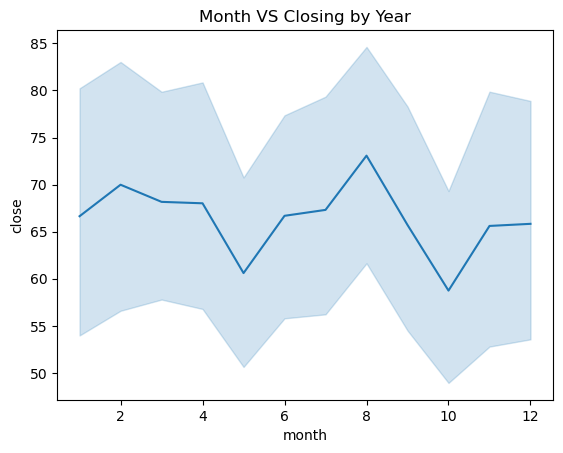

In [75]:
sns.lineplot(x="month", y="close", data=df_data)
plt.title("Month VS Closing by Year")
plt.show()

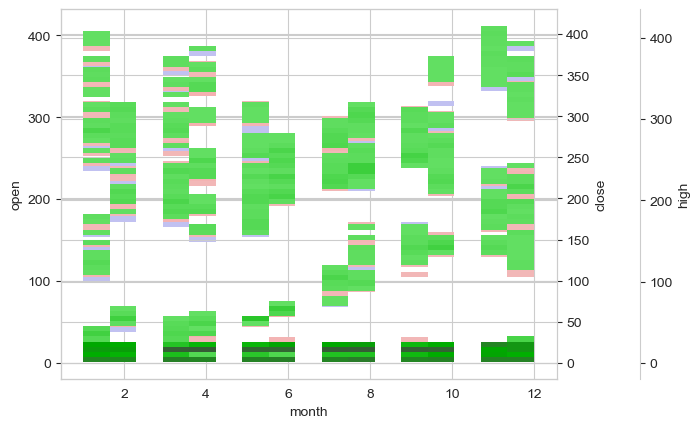

<Figure size 1000x600 with 0 Axes>

In [54]:
# Create the first set of histograms for "open" values in blue
ax1 = sns.histplot(data=df_data, x="month", y="open",color="blue")
plt.figure(figsize=(10, 6))

# Create a second y-axis on the right side to overlay additional plots
ax2 = ax1.twinx()
sns.histplot(data=df_data, x="month", y="close",color="red", ax=ax2)

# Create the third set of histograms for "high" values in green and overlay on the same plot with ax1 and ax2
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Adjust the position of the third y-axis
sns.histplot(data=df_data, x="month", y="high", color='green', ax=ax3)
plt.show()


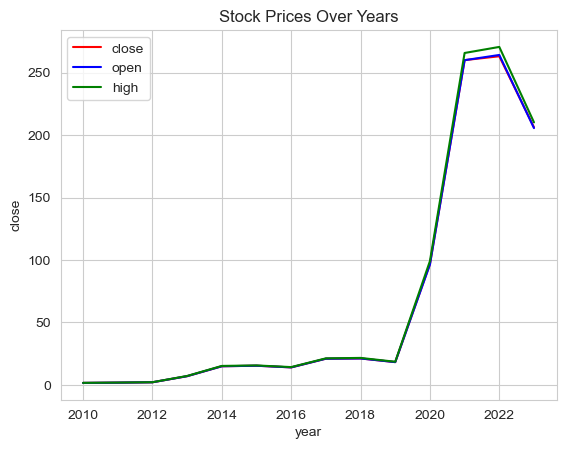

In [55]:
# Create a line plot for "close" values over years in red with a label
sns.lineplot(data=df_data, x="year", y="close", color="red", label="close",errorbar=None)

# Create a line plot for "open" values over years in red with a label
sns.lineplot(data=df_data, x="year", y="open", color="blue", label="open",errorbar=None)

# Create a line plot for "high" values over years in red with a label
sns.lineplot(data=df_data, x="year", y="high", color="green", label="high", errorbar=None)
plt.legend(loc="upper left")
plt.title("Stock Prices Over Years")
plt.show()

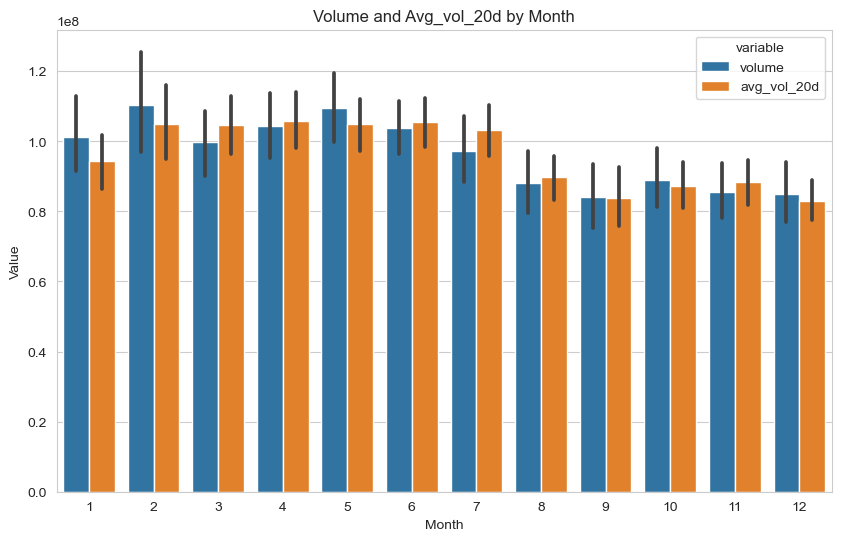

In [56]:
# Melt the DataFrame to combine "volume" and "avg_vol_20d" into a single column
melted_df = df_data.melt(id_vars=["month"], value_vars=["volume", "avg_vol_20d"], var_name="variable", value_name="value")
plt.figure(figsize=(10, 6))

# Create a bar plot for "value" over "month" with hue representing the "variable" (volume or avg_vol_20d)
sns.barplot(x="month", y="value", hue="variable", data=melted_df)
plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Volume and Avg_vol_20d by Month")
plt.show()

#avg_vol_20d is the average volume for the last 20 days


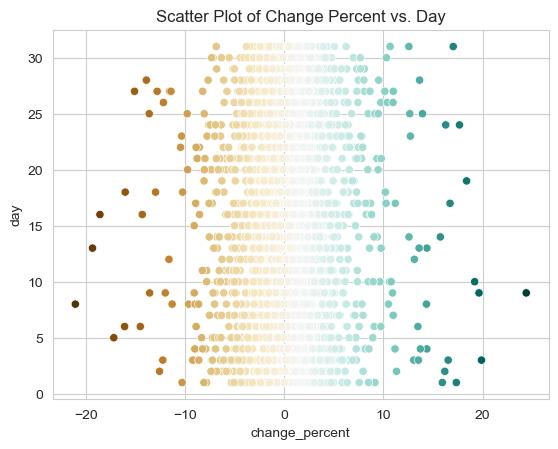

In [57]:
# Create a scatter plot for "change_percent" on the x-axis and "day" on the y-axis
# The color of the points is determined by "change_percent" and uses a brown-green color palette
# The legend is turned off for simplicity
sns.scatterplot(data=df_data, x="change_percent", y="day", hue="change_percent", palette="BrBG", legend=False)

plt.title("Scatter Plot of Change Percent vs. Day")
plt.show()      
#change_percent = Day-to-day percentage change in the closing price.

In [5]:
# Calculate the correlation matrix for the DataFrame
cor_matrix = df_data.corr()
cor_matrix

,year,month,day,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
year,1.000000,-0.103476,-0.003258,0.752042,0.752177,0.752211,0.752348,0.407139,0.665326,0.003203,0.513608
month,-0.103476,1.000000,-0.000236,-0.010276,-0.011538,-0.009472,-0.010245,-0.095546,-0.040859,-0.013413,-0.103194
day,-0.003258,-0.000236,1.000000,-0.004235,-0.003791,-0.002988,-0.002424,-0.038415,0.006979,0.027667,0.009286
open,0.752042,-0.010276,-0.004235,1.000000,0.999611,0.999612,0.999200,0.096288,0.665878,-0.010681,0.132625
high,0.752177,-0.011538,-0.003791,0.999611,1.000000,0.999489,0.999522,0.100060,0.667244,-0.002181,0.134017
low,0.752211,-0.009472,-0.002988,0.999612,0.999489,1.000000,0.999680,0.092951,0.665456,-0.000988,0.131582
close,0.752348,-0.010245,-0.002424,0.999200,0.999522,0.999680,1.000000,0.097233,0.666855,0.008417,0.133468
volume,0.407139,-0.095546,-0.038415,0.096288,0.100060,0.092951,0.097233,1.000000,0.333641,0.082402,0.767542
raw_close,0.665326,-0.040859,0.006979,0.665878,0.667244,0.665456,0.666855,0.333641,1.000000,0.053991,0.413997
change_percent,0.003203,-0.013413,0.027667,-0.010681,-0.002181,-0.000988,0.008417,0.082402,0.053991,1.000000,0.041631


In [50]:
cor_matrix.unstack()

year         year              1.000000
             month            -0.103476
             day              -0.003258
             open              0.752042
             high              0.752177
                                 ...   
avg_vol_20d  close             0.133468
             volume            0.767542
             raw_close         0.413997
             change_percent    0.041631
             avg_vol_20d       1.000000
Length: 121, dtype: float64

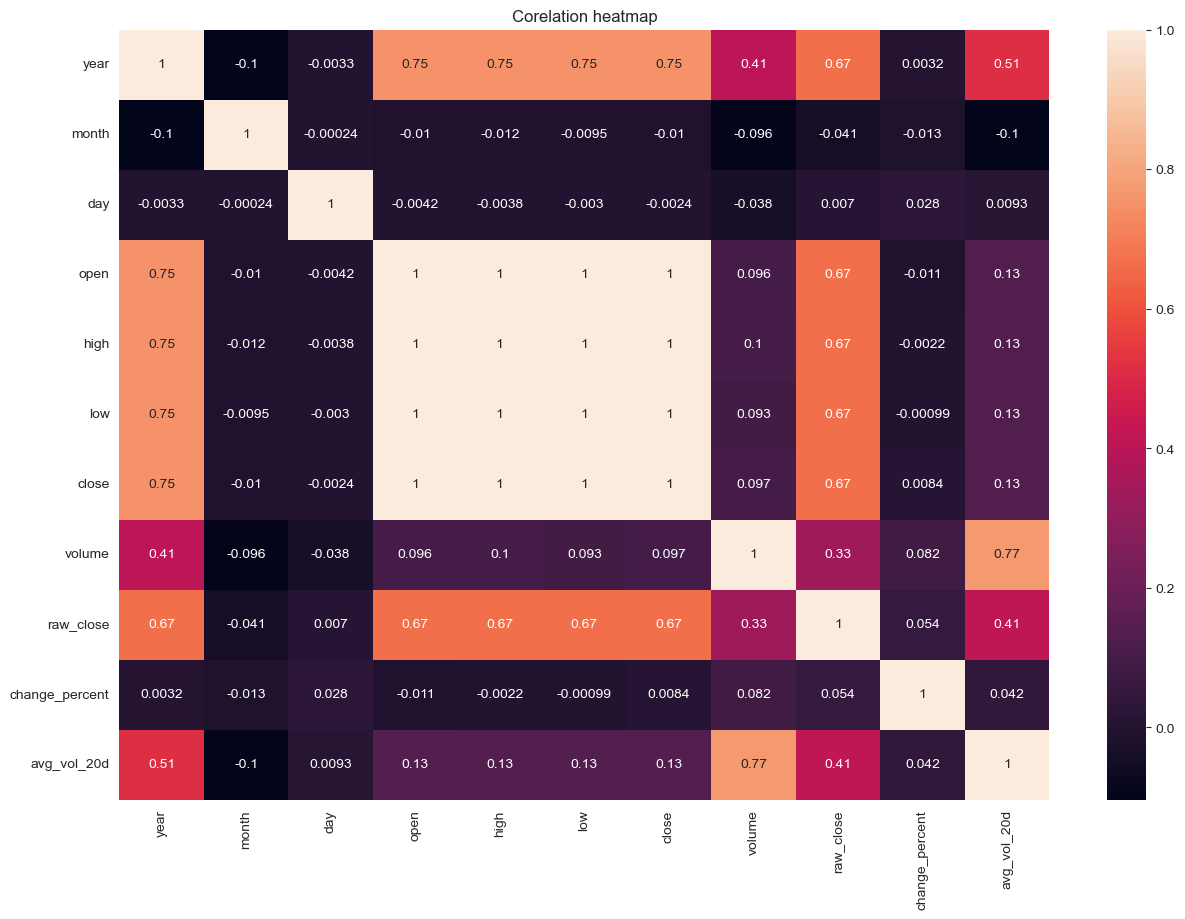

In [58]:
# Create a figure with a specified size
plt.figure(figsize=(15, 10))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(cor_matrix, annot=True)
plt.title("Corelation heatmap")
plt.show()

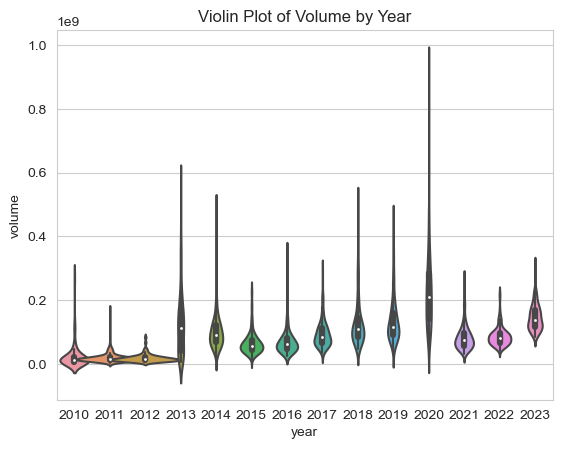

In [59]:
sns.set_style("whitegrid")
# Create a violin plot for "volume" over "year" with a width of 2
sns.violinplot(data=df_data, x="year", y="volume", width=2)
plt.title("Violin Plot of Volume by Year")
plt.show()

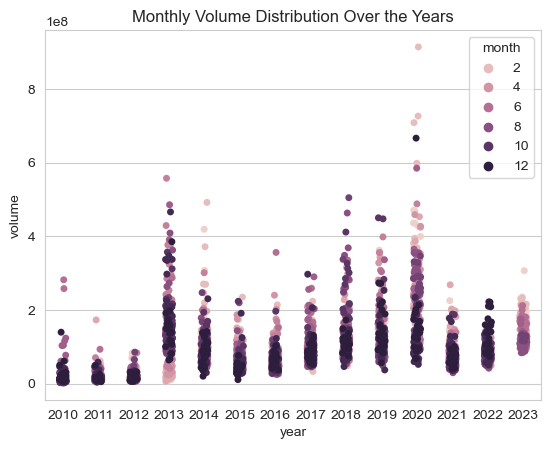

In [60]:
# Create a strip plot for "volume" by "year" with different colors for each "month"
sns.stripplot(data=df_data, x="year", y="volume", hue="month")
plt.title("Monthly Volume Distribution Over the Years")
plt.show()

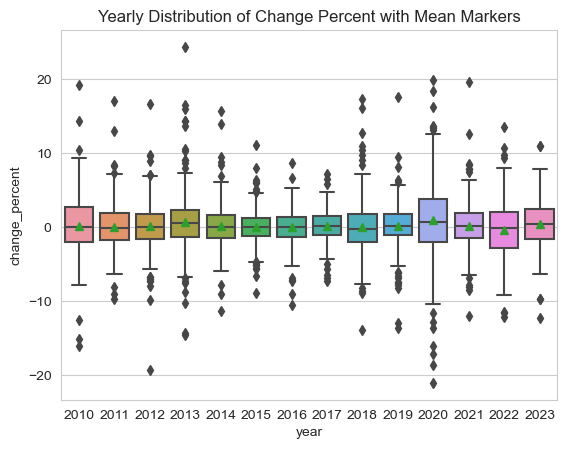

In [61]:
sns.boxplot(data=df_data, x="year", y="change_percent", showmeans=True)
plt.title("Yearly Distribution of Change Percent with Mean Markers")
plt.show()